<a href="https://colab.research.google.com/github/TusharTaneja22/Sentiment-Analysis/blob/main/Financial_News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Financial News Dataset Link :https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news

#Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('all-data.csv',names=['label','text'],encoding='latin-1')

In [3]:
df.head()

,label,text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [4]:
df.isna().sum()

label    0
text     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   4846 non-null   object
 1   text    4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [6]:
df['label'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [7]:
df['label'].value_counts()

neutral     2879
positive    1363
negative     604
Name: label, dtype: int64

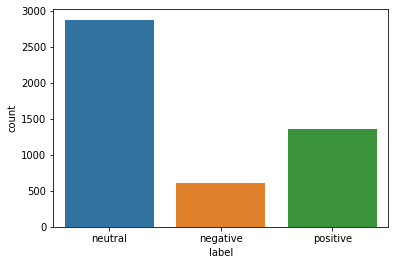

In [8]:
sns.countplot(x='label',data=df)

In [9]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
# Lemmatization & removing stopwords
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
text_lemmatization=[]
for i in range(0,len(df['text'])):
    rep=re.sub('[^a-zA-Z]',' ',df['text'][i]) #replace non-alphabet words with space
    rep=rep.lower()
    rep=rep.split()
    rep=[wordnet.lemmatize(word) for word in rep if not word in set(stopwords.words('english'))]
    rep=' '.join(rep)
    text_lemmatization.append(rep)

In [11]:
df['text_lemmatization']=pd.Series(text_lemmatization)
df.head()

,label,text,text_lemmatization
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...
2,negative,The international electronic industry company ...,international electronic industry company elco...
3,positive,With the new production plant the company woul...,new production plant company would increase ca...
4,positive,According to the company 's updated strategy f...,according company updated strategy year baswar...


In [12]:
df1=df[df['label']=='positive']

In [13]:
df2=df[df['label']=='negative']

In [14]:
df=pd.concat([df,df2,df1,df2,df2])

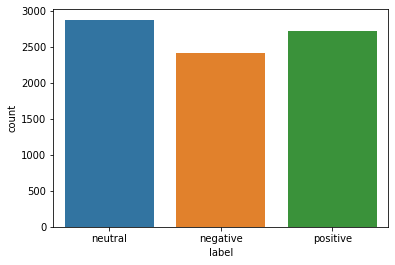

In [15]:
sns.countplot(x='label',data=df)

In [16]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
X=vect.fit_transform(df['text_lemmatization'])
print(sorted(vect.vocabulary_))
print(X.shape)
print(X.toarray())

['aaland', 'aalborg', 'aalto', 'aaltonen', 'aaron', 'aava', 'aazhang', 'ab', 'abb', 'abbott', 'aberration', 'abidjan', 'ability', 'able', 'abloy', 'abn', 'aboavista', 'abp', 'abramov', 'abramovich', 'abroad', 'absentee', 'absolut', 'absorption', 'abu', 'ac', 'aca', 'acacia', 'acanb', 'acando', 'accelerate', 'accelerated', 'acceptance', 'accepted', 'access', 'accessible', 'accessory', 'accident', 'accommodate', 'accommodation', 'accomplish', 'accomplishing', 'accordance', 'according', 'accordingly', 'account', 'accountant', 'accounted', 'accounting', 'accumulate', 'accumulated', 'acg', 'achieve', 'achieved', 'achievement', 'achieving', 'acid', 'acknowledged', 'acnielsen', 'acquire', 'acquired', 'acquirer', 'acquires', 'acquiring', 'acquisition', 'acquitted', 'across', 'act', 'acted', 'acting', 'action', 'activate', 'activated', 'activating', 'activation', 'active', 'actively', 'activeness', 'activision', 'activity', 'actor', 'actual', 'actually', 'ad', 'adac', 'adak', 'adam', 'adanac', 

In [17]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vect=TfidfVectorizer()
tfidf_matrix=vect.fit_transform(df['text_lemmatization'])
print(vect.get_feature_names())
print(tfidf_matrix.shape)
df1=pd.DataFrame(tfidf_matrix.toarray(),columns=vect.get_feature_names())
df1.head()

['aaland', 'aalborg', 'aalto', 'aaltonen', 'aaron', 'aava', 'aazhang', 'ab', 'abb', 'abbott', 'aberration', 'abidjan', 'ability', 'able', 'abloy', 'abn', 'aboavista', 'abp', 'abramov', 'abramovich', 'abroad', 'absentee', 'absolut', 'absorption', 'abu', 'ac', 'aca', 'acacia', 'acanb', 'acando', 'accelerate', 'accelerated', 'acceptance', 'accepted', 'access', 'accessible', 'accessory', 'accident', 'accommodate', 'accommodation', 'accomplish', 'accomplishing', 'accordance', 'according', 'accordingly', 'account', 'accountant', 'accounted', 'accounting', 'accumulate', 'accumulated', 'acg', 'achieve', 'achieved', 'achievement', 'achieving', 'acid', 'acknowledged', 'acnielsen', 'acquire', 'acquired', 'acquirer', 'acquires', 'acquiring', 'acquisition', 'acquitted', 'across', 'act', 'acted', 'acting', 'action', 'activate', 'activated', 'activating', 'activation', 'active', 'actively', 'activeness', 'activision', 'activity', 'actor', 'actual', 'actually', 'ad', 'adac', 'adak', 'adam', 'adanac', 

,aaland,aalborg,aalto,aaltonen,aaron,aava,aazhang,ab,abb,abbott,aberration,abidjan,ability,able,abloy,abn,aboavista,abp,abramov,abramovich,abroad,absentee,absolut,absorption,abu,ac,aca,acacia,acanb,acando,accelerate,accelerated,acceptance,accepted,access,accessible,accessory,accident,accommodate,accommodation,...,yhtym,yhtyma,yield,yiliang,yinhe,yit,yitgroup,ylinen,yliopistonrinne,ylivieska,yokohama,york,young,youtube,yr,yry,ystok,yty,yuval,yvonne,zahariev,zaharova,zain,zainalabedin,zanadvorov,zandvliet,zao,zapadnye,zealand,zepro,zero,zgody,zinc,zip,zloty,zoltan,zone,zoo,zte,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
from sklearn.preprocessing import LabelEncoder
df['encoded_label']=LabelEncoder().fit_transform(df['label'])
df.head()

,label,text,text_lemmatization,encoded_label
0,neutral,"According to Gran , the company has no plans t...",according gran company plan move production ru...,1
1,neutral,Technopolis plans to develop in stages an area...,technopolis plan develop stage area le square ...,1
2,negative,The international electronic industry company ...,international electronic industry company elco...,0
3,positive,With the new production plant the company woul...,new production plant company would increase ca...,2
4,positive,According to the company 's updated strategy f...,according company updated strategy year baswar...,2


In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df1,df.encoded_label,test_size=0.20,random_state=0)

In [20]:
#Applying Relevant Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

models={'SVC':LinearSVC(),'Logistic':LogisticRegression(),'Mnb':MultinomialNB(),'Rf':RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)}
for i in models:
  model=models[i]
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  print("{} accuracy score: {}%".format(i,round(accuracy_score(y_test,y_pred)*100,2)))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test, y_pred))
  print("F1 Score:{}".format(f1_score(y_test,y_pred,average='micro')))


SVC accuracy score: 89.53%
[[450   0  15]
 [ 31 474  65]
 [ 21  36 513]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       465
           1       0.93      0.83      0.88       570
           2       0.87      0.90      0.88       570

    accuracy                           0.90      1605
   macro avg       0.90      0.90      0.90      1605
weighted avg       0.90      0.90      0.89      1605

F1 Score:0.8953271028037383


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Logistic accuracy score: 85.55%
[[428  14  23]
 [ 27 491  52]
 [ 28  88 454]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       465
           1       0.83      0.86      0.84       570
           2       0.86      0.80      0.83       570

    accuracy                           0.86      1605
   macro avg       0.86      0.86      0.86      1605
weighted avg       0.86      0.86      0.85      1605

F1 Score:0.8554517133956386
Mnb accuracy score: 80.37%
[[445   5  15]
 [ 55 437  78]
 [ 73  89 408]]
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       465
           1       0.82      0.77      0.79       570
           2       0.81      0.72      0.76       570

    accuracy                           0.80      1605
   macro avg       0.80      0.81      0.80      1605
weighted avg       0.81      0.80      0.80      1605

F1 Score:0.8037383177570093
Rf accuracy score: 91.46%
[[460